1.

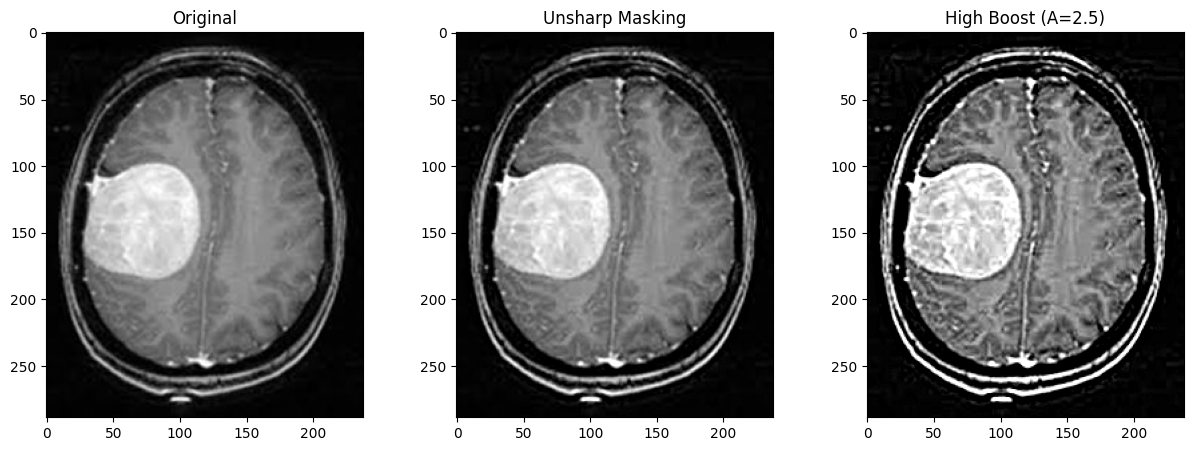

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Picture1.jpg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (0, 0), 3)
unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
high_boost = cv2.addWeighted(image, 3.5, blurred, -2.5, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(unsharp_mask, cmap='gray'), plt.title('Unsharp Masking')
plt.subplot(133), plt.imshow(high_boost, cmap='gray'), plt.title('High Boost (A=2.5)')
plt.show()

**Unsharp Masking is better for this image because:**

It improves edge visibility without overshooting (no "halo" artifacts)

Maintains a more natural look

Doesn't amplify noise as aggressively as High Boost

The histogram remains better balanced


**High Boost is too aggressive here, causing:**

Over-sharpened edges

Potential noise amplification

Less natural appearance

Wider histogram spread indicating possible contrast distortion


2.

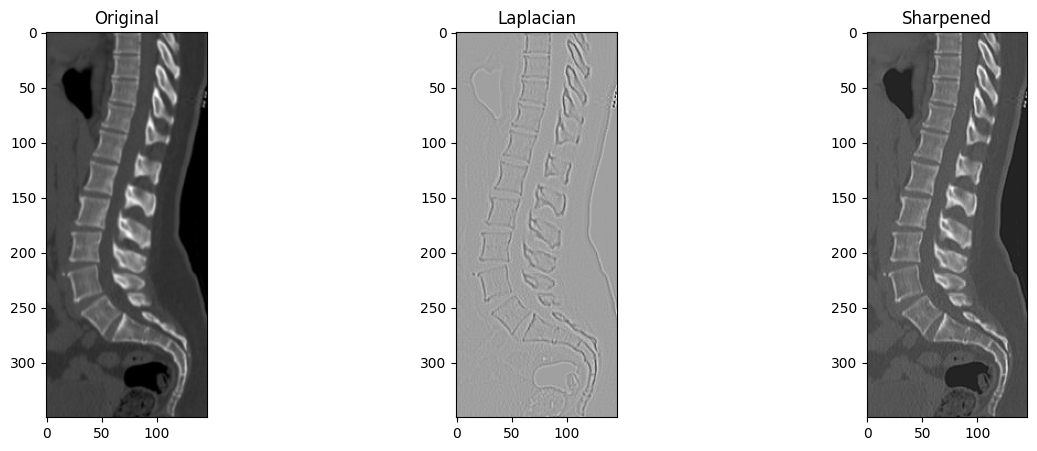

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Picture2.jpg', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
sharpened = image - 0.5*laplacian

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(133), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.show()

3.

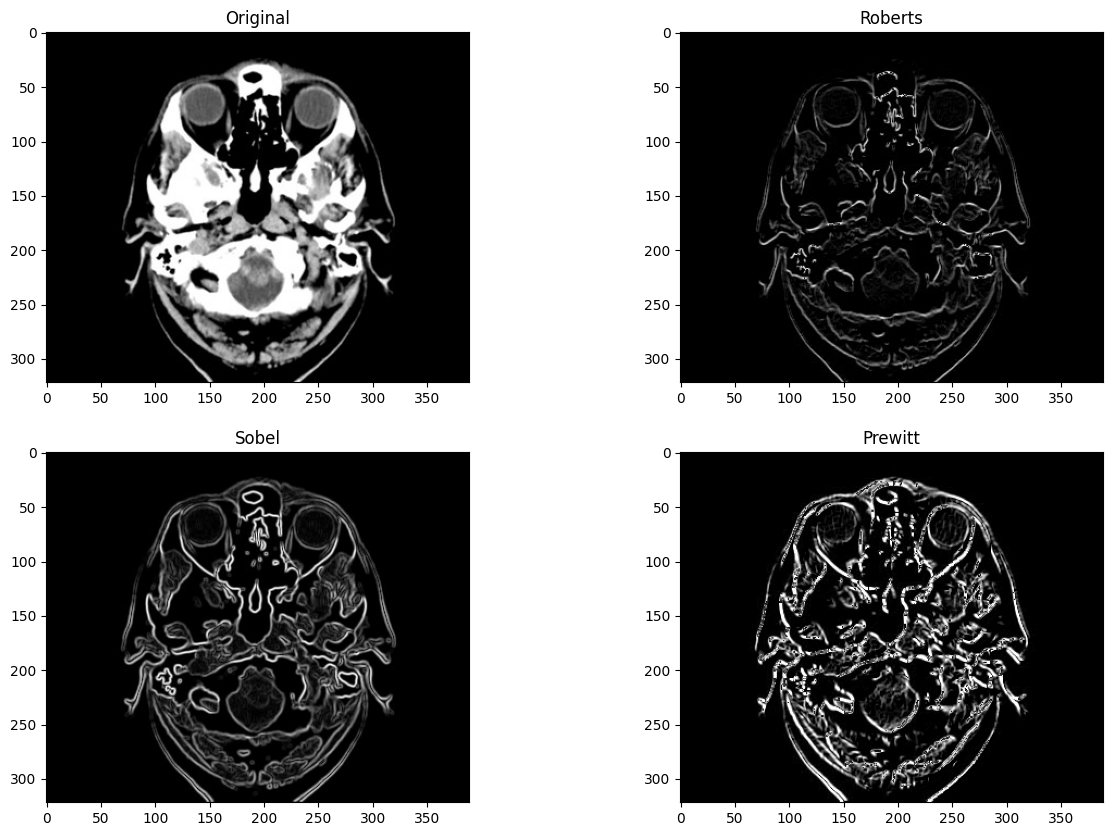

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Picture3.jpg', cv2.IMREAD_GRAYSCALE)

roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts = np.abs(cv2.filter2D(image, -1, roberts_x)) + np.abs(cv2.filter2D(image, -1, roberts_y))

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = np.abs(prewitt_x) + np.abs(prewitt_y)

plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(roberts, cmap='gray'), plt.title('Roberts')
plt.subplot(223), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(224), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt')
plt.show()

**Roberts Operator:**

Uses 2x2 kernels to detect diagonal edges

Simple but sensitive to noise

Good for sharp, high-contrast edges

**Sobel Operator:**

Uses 3x3 kernels (horizontal and vertical)

Provides smoothing effect (less noise-sensitive)

Better at detecting edges in multiple directions

**Prewitt Operator:**

Similar to Sobel but with uniform kernel weights

More sensitive to noise than Sobel

Good for edge orientation detection

*The output shows:*

Original image (top-left)

Roberts edge detection (top-right)

Sobel edge detection (bottom-left)

Prewitt edge detection (bottom-right)

Sobel typically gives the cleanest results, while Roberts preserves finer details but is noisier. Prewitt offers a balance between them.



4.

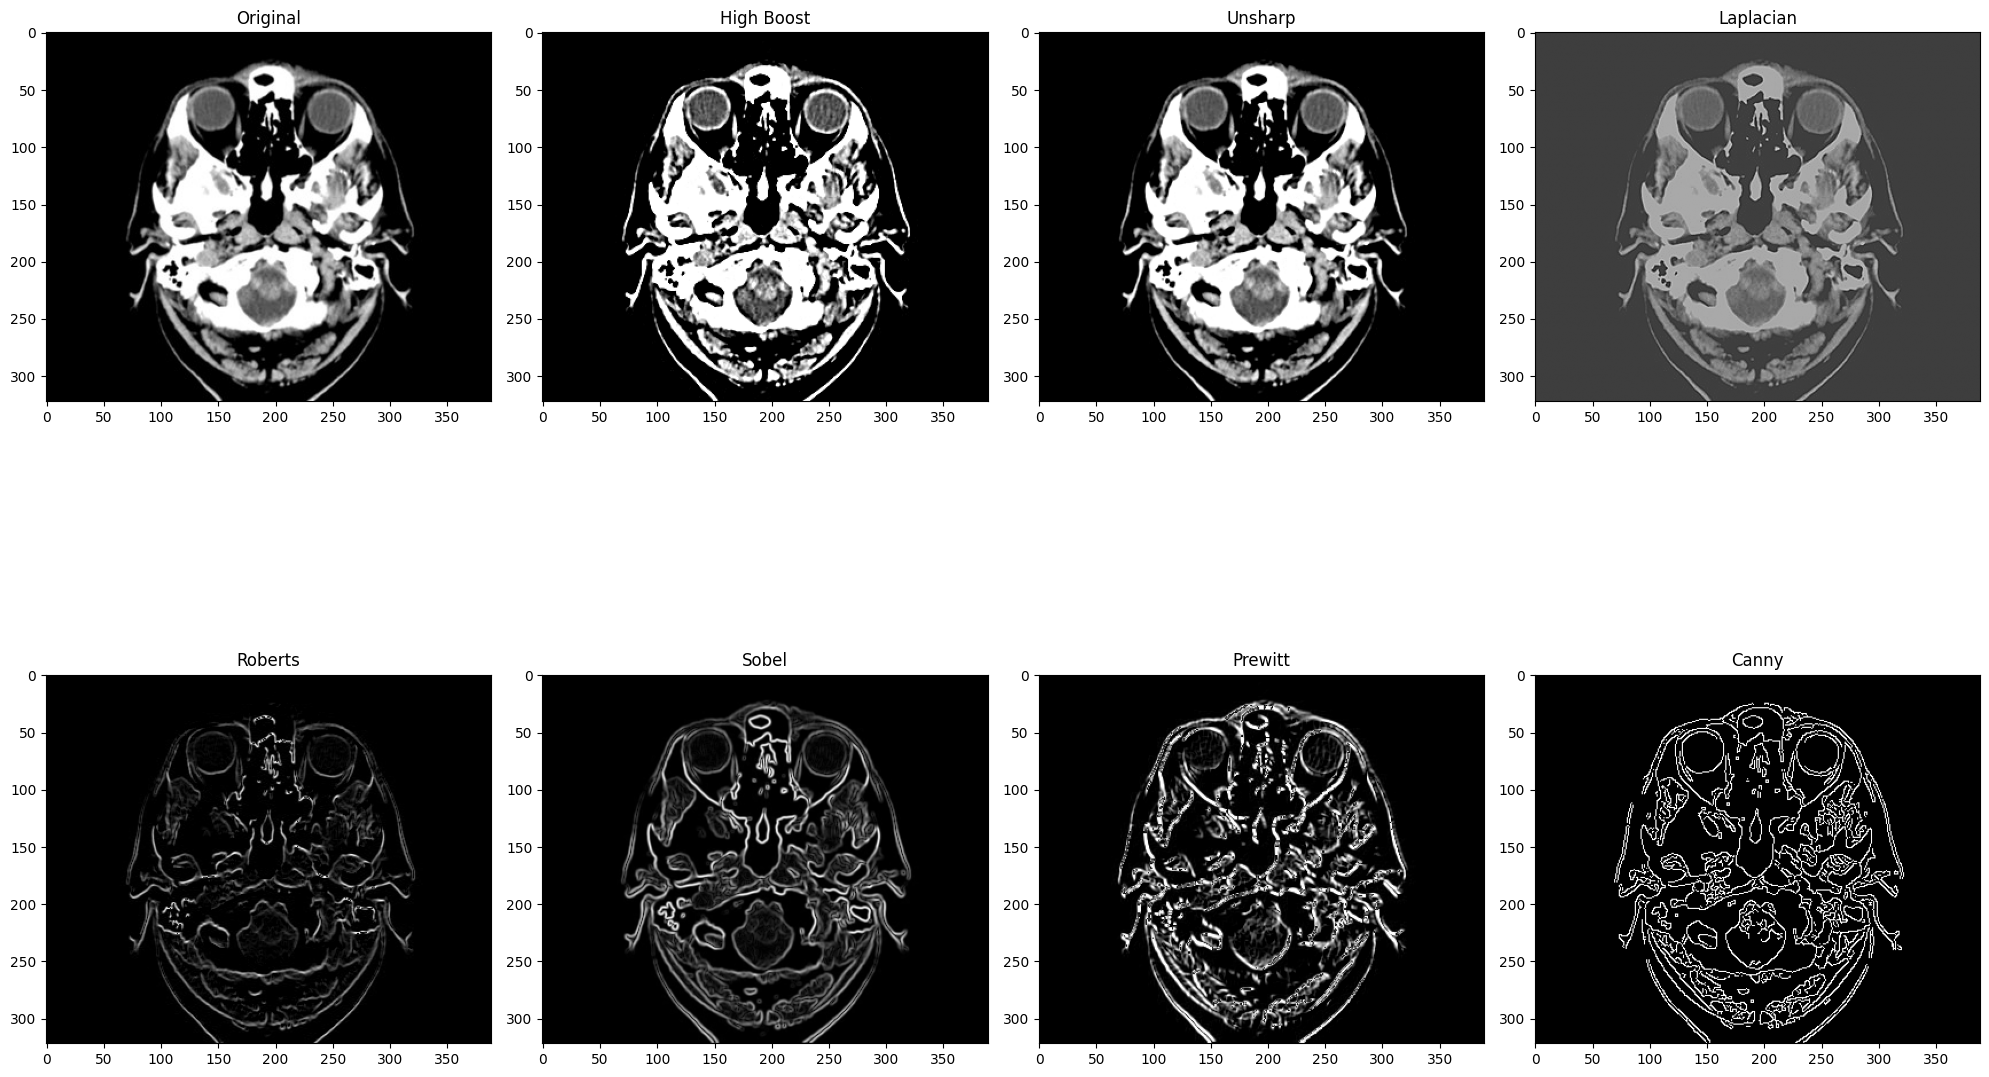

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Picture3.jpg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (0, 0), 3)
high_boost = cv2.addWeighted(image, 3.5, blurred, -2.5, 0)
unsharp = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
lap_sharp = image - 0.5*laplacian

roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts = np.abs(cv2.filter2D(image, -1, roberts_x)) + np.abs(cv2.filter2D(image, -1, roberts_y))

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = np.abs(prewitt_x) + np.abs(prewitt_y)

canny = cv2.Canny(image, 100, 200)

plt.figure(figsize=(20, 15))
plt.subplot(241), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(242), plt.imshow(high_boost, cmap='gray'), plt.title('High Boost')
plt.subplot(243), plt.imshow(unsharp, cmap='gray'), plt.title('Unsharp')
plt.subplot(244), plt.imshow(lap_sharp, cmap='gray'), plt.title('Laplacian')
plt.subplot(245), plt.imshow(roberts, cmap='gray'), plt.title('Roberts')
plt.subplot(246), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(247), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt')
plt.subplot(248), plt.imshow(canny, cmap='gray'), plt.title('Canny')
plt.tight_layout()
plt.show()

*Performance Comparison Analysis:*


**High Boost Filter**


*   What it does well: Really brings out edges strongly - like turning up the sharpness to maximum
*   Downside: Also makes any graininess or noise in the image much more noticeable

When to use: If your image is very blurry and needs dramatic sharpening

**Unsharp Masking**


*  What it does well: Gives a nice, balanced sharpening effect
*   Downside: Can make some noise more visible, but not too badly

When to use: For everyday sharpening needs when you want a natural look

**Laplacian Filter**


*   What it does well: Captures even the tiniest details beautifully
*   Downside: Goes a bit overboard with noise - shows every little imperfection

When to use: When working with high-quality images where you need to preserve fine textures

**Roberts Cross**


*   What it does well: Simple and fast, good at catching diagonal lines
*   
Downside: Misses some edges and can be jumpy with noisy images


When to use: Quick checks on simple images with clear edges

**Sobel Operator**


*   What it does well: Solid all-around performer - finds edges in all directions while keeping noise in check
*   Downside: Edges come out a bit thicker than some other methods


When to use: Your reliable go-to for most edge detection tasks

**Prewitt Operator**


*   What it does well: Gives consistent edge detection across directions
*   Downside: A bit more sensitive to noise than Sobel


When to use: When you need to analyze edge directions specifically

**Canny Edge Detector**


*   What it does well: Gives you the cleanest, most precise edges while ignoring noise
*   Downside: Takes more computer power to process


When to use: When you need professional-quality results for important work


***What Should We Use?***

For most situations, the Canny edge detector is your best bet because:

It draws the cleanest, most accurate outlines

Smartly ignores random noise and grain

Connects edges properly for complete shapes

Gives nice thin lines that are easy to work with





